# A1: Classification Model Development
By Karla Garcia Corral Lobo | Hult International Business School | San Francisco, CA. | February 19, 2023

Bibliography: Based on Jupiter Notebook scripts by Professor Chase Kusterer.

This assignment focuses on analyzing Apprentice Chef’s customer database to determine the variables that have the most impact on the cross-selling success of the business. The “CROSS_SELL_SUCCESS” will serve as the dependent variable (y), while the other variables are used are the interdepend variables (x). This database contains approximately 2,000 customers who made at least one purchase per month for 11 months in their first year, at least one purchase per quarter, or a minimum of 15 purchases throughout their first year.

The goal was to identify the variables that have the most significant impact on cross-selling, which can help Apprentice Chef optimize its sales efforts and increase its bottom line. In addition, new features were developed to improve the interpretability of our data and the performance of the model.

This study begins by examining Chef Apprentice's customer data to gain an understanding of consumer behavior patterns and their impact on the business's revenue. In this analysis, we first determined the variables that needed to be cleaned and identified any new potential features that could be created based on the existing information in the customer database.

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np                       # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# loading data
apprentice = pd.read_excel('./Cross_Sell_Success_Dataset_2023.xlsx')

# displaying the head of the dataset
apprentice.head(n = 5)

CROSS_SELL_SUCCESS                             EMAIL  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED
0                   1       steffon.baratheon@yahoo.com   4920.0                  493                   9                            1                         10                    265.6                         5          5              2            0                 0             137.41                   6         2.894737                  456
1                   0           harlon.greyjoy@visa.com   6150.0                  361                   9                            1                          6                    247.0                         2          5              1            0                 0             120.20                   5         2.631579                  680
2                   0            monster@protonmail.com   3435.0                  278                   6                            1                          4                    164.4                         0          6              1            5                 0             127.00                   3         3.684211                  145
3                   1  damon.lannister.(lord)@yahoo.com   3330.0                  269                   8                            1                          2                    176.0                         5          5              2            0                 0             129.78                   6         3.157895                  418
4                   1        raynald.westerling@jnj.com   3427.5                  276                   7                            1                         10                    164.6                         0          6              1           14                 0              34.42                   3         3.157895                  174

In [2]:
#Printing information about the size of the database, the number or rows and columns.
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     17



In [3]:
# pulling up data dictionary
apprentice_description = pd.read_excel('./Cross_Sell_Success_Dataset_2023.xlsx')


# displaying the data dictionary
apprentice_description

CROSS_SELL_SUCCESS                             EMAIL   REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED
0                      1       steffon.baratheon@yahoo.com  4920.000                  493                   9                            1                         10                    265.6                         5          5              2            0                 0             137.41                   6         2.894737                  456
1                      0           harlon.greyjoy@visa.com  6150.000                  361                   9                            1                          6                    247.0                         2          5              1            0                 0             120.20                   5         2.631579                  680
2                      0            monster@protonmail.com  3435.000                  278                   6                            1                          4                    164.4                         0          6              1            5                 0             127.00                   3         3.684211                  145
3                      1  damon.lannister.(lord)@yahoo.com  3330.000                  269                   8                            1                          2                    176.0                         5          5              2            0                 0             129.78                   6         3.157895                  418
4                      1        raynald.westerling@jnj.com  3427.500                  276                   7                            1                         10                    164.6                         0          6              1           14                 0              34.42                   3         3.157895                  174
...                  ...                               ...       ...                  ...                 ...                          ...                        ...                      ...                       ...        ...            ...          ...               ...                ...                 ...              ...                  ...
1941                   0         wat.(barleycorn)@live.com  2940.000                   89                   6                           13                          3                    143.0                         1          5              2            8                 0              53.00                   5         2.894737                   16
1942                   1          hendry.bracken@exxon.com  7087.500                  155                   7                           13                          9                    169.4                         0          6              2            0                 8              39.00                   5         2.631579                  302
1943                   0    aenys.i.targaryen@passport.com  6562.500                   65                   9                           13                          6                    187.4                         1          5              1            0                 9              48.00                   6         2.631579                  310
1944                   1               leo.blackbar@pg.com  5355.000                   58                   9                           18                         10                    238.5                         3          6              1            0                 0              31.00                   6         2.631579                  275
1945                   0                  anguy@boeing.com  5194.875                   96                   7                           19       

In [4]:
# Information about each variable
apprentice.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

In [5]:
#Dividing the columns into categories Continuos 

#REVENUE                      - Continuos
#AVG_TIME_PER_SITE_VISIT      - Continuos
#AVG_PREP_VID_TIME            - Continuos
#AVG_MEAN_RATING              - Continuos
#TOTAL_MEALS_ORDERED          - Discrete
#UNIQUE_MEALS_PURCH           - Discrete
#CONTACTS_W_CUSTOMER_SERVICE  - Discrete
#PRODUCT_CATEGORIES_VIEWED    - Discrete
#CANCELLATIONS_AFTER_NOON     - Discrete
#PC_LOGINS                    - Discrete
#MOBILE_LOGINS                - Discrete
#WEEKLY_PLAN                  - Discrete
#LATE_DELIVERIES              - Discrete
#AVG_ORDER_SIZE               - Discrete
#TOTAL_PHOTOS_VIEWED          - Discrete

# Data Cleaning

Following our analysis of Chef Apprentice's customer data, we identified several interesting elements which may impact the ability to perform the analysis. These elements are summarized below:
-	Data Type: of the 16 features present in the data set and all of them can be utilized for the analysis as they are either integer or float. The only object is the email variable, however, that will be converted into a boolean data type further on. 
-	Data Classification: the features with a float data type will be categorized as “continuous”, while those with an integer data type will be categorized as “discrete”. 
-	Missing values: There are no missing values. 

Based on these observations, it is evident that the database will require cleaning prior to performing the analysis. However, there are only two columns that need cleaning, the first one is “LARGETS_ORDER_SIZE” this one needs to be renamed to “AVG_ORDER_SIZE” as it was mislabeled, and it is important to keep in mind that is average and not the largest. The second one is “LATE_DELIVERIES_” as it has a space between the last letter and the quotation marks, which makes it difficult to keep track of at the time of the analysis.

In [6]:
#renaming the columns 
apprentice = apprentice.rename(columns = {'LARGEST_ORDER_SIZE': 'AVG_ORDER_SIZE'}) #Mislabeled 
apprentice = apprentice.rename(columns = {'LATE_DELIVERIES ': 'LATE_DELIVERIES'}) #remove the extra space

In [7]:
# looping to print column names one by one
for column in apprentice:
    print(column)

CROSS_SELL_SUCCESS
EMAIL
REVENUE
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES
AVG_PREP_VID_TIME
AVG_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


# Feature Development

When developing the new features, it was important to keep in mind that Apprentice Chef, inc. is an innovative company that offers daily prepared, easy gourmet meal kits to cook at home made from fresh ingredients. Their target market consists of busy professionals who lack the time needed for cooking healthy meals but still desire a high-quality, home-cooked meal, rather than relying on food delivery.
When assessing Chef Apprentice´s business model and their data collection, some key points influenced the features which I chose to investigate. These points are highlighted below:

- Chef Apprentice offers different meal kits based on cuisine characteristics such as vegan, gluten-free, etc. as well as cuisine types such as Japanese, Spanish, etc. And it has a recommendation engine based on factors such as previous purchases and lookalike scores. 
- The customers can order several meals at one time, this is calculated by the “TOTAL_MEALS_ORDERED”. 
- The “PRODUCT_CATEGORIES_VIEWED” is the total number of product category was viewed. 
- The “AVG_MEAN_RATING” only takes into consideration the meals that were rated, leaving out the ones that did not receive a rating.
- “WEEKLY_PLAN” represents the number of times a customer subscribed to a weekly plan discount promotion. 
- The “EMAIL” is divided into 3: Personal, Professional, and Junk, and depending on their domain is their email response rate. 

Based on this information, 7 new features were created to provide better insights into customer behavior and patterns that may help predict an increase in cross-selling success. Understanding the customer’s needs, preferences, and purchase history, can help identify other products that are complementary to what they already have purchased. 

- “HIGH_REVENUE” was first created to divide the customer into two groups. The ones that have spent more than 1,740, which is the median, are placed in this category. 

- “LOYAL_CUSTOMER” was created based on the total number of meals ordered, if they have ordered more than 74, which means, they are considered a loyal customer. This feature can be a good predictor of cross-sell success because a customer who orders more meals is more likely to be interested in trying new meals. 

- “HIGH_PRODUCT_VIEW” was created based on the “PRODUCT_CATEGORIES_VIEWED” as customers who view a larger number of product categories are likely to be more engaged in the website and potentially more interested in trying new products. 

- “HIGH_AVG_RATING” was created using the “AVG_MEAN_RATING” feature to distinguish which customers are the ones that are rating the highest as they may be more likely to be interested in trying new meals and cross-selling promotions. 

- “HIGH_WEEKLY_PLAN” was created based on “WEEKLY_PLAN” as the customers who have subscribed the most frequently to the promotion plan may be more likely to be interested in trying new things. 

- Email dummies were created to divide into 3 groups, personal, professional, and junk to be able to analyze them together with the “CROSS_SELLING_SUCCESS” variable. 

In [8]:
# calculating the mean of a REVENUE
mean_value = apprentice['REVENUE'].mean()
#mean_value = apprentice['log_REVENUE'].mean() -trying to calculate it with log_REVENUE instead

# calculate the median of a REVENUE
median_value = apprentice['REVENUE'].median()
#median_value = apprentice['log_REVENUE'].median() 

# calculating the highest REVENUE
max_value = apprentice['REVENUE'].max()

# calculating the lowest REVENUE
min_value = apprentice['REVENUE'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 2107.292651593011
Median: 1740.0
Max: 8793.75
Min: 131.0


In [9]:
# placeholder for 'HIGH_REVENUE' feature
apprentice['HIGH_REVENUE'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'REVENUE'] > 1740:
        apprentice.loc[index, 'HIGH_REVENUE'] = 1


# checking results
apprentice['HIGH_REVENUE'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

1    972
0    974
Name: HIGH_REVENUE, dtype: int64

In [10]:
# calculating the mean of a TOTAL_MEALS_ORDERED
mean_value = apprentice['TOTAL_MEALS_ORDERED'].mean()

# calculating the median of a TOTAL_MEALS_ORDERED
median_value = apprentice['TOTAL_MEALS_ORDERED'].median()

# calculating the highest number of a TOTAL_MEALS_ORDERED
max_value = apprentice['TOTAL_MEALS_ORDERED'].max()

# calculating the lowest number of a TOTAL_MEALS_ORDERED
min_value = apprentice['TOTAL_MEALS_ORDERED'].min()

#printing values 
print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 74.63412127440904
Median: 60.0
Max: 493
Min: 11


In [11]:
# placeholder for 'LOYAL_CUSTOMER' feature
apprentice['LOYAL_CUSTOMER'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] > 74:
        apprentice.loc[index, 'LOYAL_CUSTOMER'] = 1


# checking results
apprentice['LOYAL_CUSTOMER'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

1     717
0    1229
Name: LOYAL_CUSTOMER, dtype: int64

In [12]:
# calculating the mean of a PRODUCT_CATEGORIES_VIEWED
mean_value = apprentice['PRODUCT_CATEGORIES_VIEWED'].mean()

# calculate the median of a TOTAL_MEALS_ORDERED
median_value = apprentice['PRODUCT_CATEGORIES_VIEWED'].median()

# calculating the highest number of a PRODUCT_CATEGORIES_VIEWED
max_value = apprentice['PRODUCT_CATEGORIES_VIEWED'].max()

# calculating the lowest number of a PRODUCT_CATEGORIES_VIEWED
min_value = apprentice['PRODUCT_CATEGORIES_VIEWED'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 5.383864337101747
Median: 5.0
Max: 10
Min: 1


In [13]:
# placeholder for 'HIGH_PRODCT_VIEW' feature
apprentice['HIGH_PRODCT_VIEW'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'PRODUCT_CATEGORIES_VIEWED'] > 5.3:
        apprentice.loc[index, 'HIGH_PRODCT_VIEW'] = 1


# checking results
apprentice['HIGH_PRODCT_VIEW'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

1     916
0    1030
Name: HIGH_PRODCT_VIEW, dtype: int64

In [14]:
# calculating the mean of a AVG_MEAN_RATING
mean_value = apprentice['AVG_MEAN_RATING'].mean()

# calculate the median of a TOTAL_MEALS_ORDERED
median_value = apprentice['AVG_MEAN_RATING'].median()

# calculating the highest number of a AVG_MEAN_RATING
max_value = apprentice['AVG_MEAN_RATING'].max()

# calculating the lowest number of a AVG_MEAN_RATING
min_value = apprentice['AVG_MEAN_RATING'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 3.554795261535153
Median: 3.4210526315789473
Max: 5.0
Min: 1.3157894736842104


In [15]:
# placeholder for 'HIGH_AVE_RATING' feature
apprentice['HIGH_AVE_RATING'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'AVG_MEAN_RATING'] > 3.5:
        apprentice.loc[index, 'HIGH_AVE_RATING'] = 1


# checking results
apprentice['HIGH_AVE_RATING'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

0    989
1    957
Name: HIGH_AVE_RATING, dtype: int64

In [16]:
# calculating the mean of a WEEKLY_PLAN
mean_value = apprentice['WEEKLY_PLAN'].mean()

# calculate the median of a TOTAL_MEALS_ORDERED
median_value = apprentice['WEEKLY_PLAN'].median()

# calculating the highest number of WEEKLY_PLAN
max_value = apprentice['WEEKLY_PLAN'].max()

# calculating the lowest number of WEEKLY_PLAN
min_value = apprentice['WEEKLY_PLAN'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 11.329907502569373
Median: 7.0
Max: 52
Min: 0


In [17]:
# placeholder for 'HIGH_WEEKLY_PLAN' feature
apprentice['HIGH_WEEKLY_PLAN'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 7:
        apprentice.loc[index, 'HIGH_WEEKLY_PLAN'] = 1


# checking results
apprentice['HIGH_WEEKLY_PLAN'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

0    988
1    958
Name: HIGH_WEEKLY_PLAN, dtype: int64

In [18]:
# calculating the mean of a WEEKLY_PLAN
mean_value = apprentice['CANCELLATIONS_AFTER_NOON'].mean()

# calculate the median of a TOTAL_MEALS_ORDERED
median_value = apprentice['CANCELLATIONS_AFTER_NOON'].median()

# calculating the highest number of WEEKLY_PLAN
max_value = apprentice['CANCELLATIONS_AFTER_NOON'].max()

# calculating the lowest number of WEEKLY_PLAN
min_value = apprentice['CANCELLATIONS_AFTER_NOON'].min()

print("Mean:", mean_value)
print("Median:", median_value)
print("Max:", max_value)
print("Min:", min_value)

Mean: 1.5709146968139773
Median: 1.0
Max: 13
Min: 0


In [19]:
# placeholder for 'HIGH_CANCELLATIONS_AFTER_NOON' feature
apprentice['HIGH_CANCELLATIONS_AFTER_NOON'] = 0


# replacing values based on a condition
for index, val in apprentice.iterrows():
    if apprentice.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 1.5:
        apprentice.loc[index, 'HIGH_CANCELLATIONS_AFTER_NOON'] = 1


# checking results
apprentice['HIGH_CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

1     791
0    1155
Name: HIGH_CANCELLATIONS_AFTER_NOON, dtype: int64

In [20]:
# creating a list with emails that have professional domain

professional = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                'caterpillar.com', 'chevron.com', 'cisco.com',
                'cocacola.com', 'disney.com', 'dupont.com', 
                'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com',
                'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                'mcdonalds.com', 'merck.com', 'microsoft.com',
                'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 
                'unitedtech.com', 'unitedhealth.com',
                'verizon.com', 'visa.com', 'walmart.com']

# creating a list with emails that have personal domain

personal     = ['gmail.com', 'yahoo.com', 'protonmail.com']

# creating a list with emails that have junk domain

junk         = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                'msn.com', 'passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for email in apprentice['EMAIL']:
    domain = email.split('@')[1]
    
    if domain in personal:
        placeholder_lst.append('personal')
        
    elif domain in professional:
        placeholder_lst.append('professional')
        
    elif domain in junk:
        placeholder_lst.append('junk')
        
    else:
        print('Unknown')

# concatenating with original DataFrame
apprentice['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
apprentice['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

In [21]:
#Creating Dummy Variables

# Creating categorical variables for the emails
dummy = pd.get_dummies(apprentice['DOMAIN_GROUP'], prefix = 'DOMAIN_GROUP')

#dropping the original domain group category since it has become unneccessary
apprentice.drop('DOMAIN_GROUP', axis = 1, inplace = True)

apprentice = pd.concat([apprentice, dummy], axis=1)

#apprentice['DOMAIN_GROUP'].value_counts()
apprentice.head(n = 5) 

CROSS_SELL_SUCCESS                             EMAIL  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES  AVG_PREP_VID_TIME  AVG_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED  HIGH_REVENUE  LOYAL_CUSTOMER  HIGH_PRODCT_VIEW  HIGH_AVE_RATING  HIGH_WEEKLY_PLAN  HIGH_CANCELLATIONS_AFTER_NOON  DOMAIN_GROUP_junk  DOMAIN_GROUP_personal  DOMAIN_GROUP_professional
0                   1       steffon.baratheon@yahoo.com   4920.0                  493                   9                            1                         10                    265.6                         5          5              2            0                0             137.41               6         2.894737                  456             1               1                 1                0                 0                              1                  0                      1                          0
1                   0           harlon.greyjoy@visa.com   6150.0                  361                   9                            1                          6                    247.0                         2          5              1            0                0             120.20               5         2.631579                  680             1               1                 1                0                 0                              1                  0                      0                          1
2                   0            monster@protonmail.com   3435.0                  278                   6                            1                          4                    164.4                         0          6              1            5                0             127.00               3         3.684211                  145             1               1                 0                1                 0                              0                  0                      1                          0
3                   1  damon.lannister.(lord)@yahoo.com   3330.0                  269                   8                            1                          2                    176.0                         5          5              2            0                0             129.78               6         3.157895                  418             1               1                 0                0                 0                              1                  0                      1                          0
4                   1        raynald.westerling@jnj.com   3427.5                  276                   7                            1                         10                    164.6                         0          6              1           14                0              34.42               3         3.157895                  174             1               1                 1                0                 1                              0                  0                      0                          1

In [22]:
# looping to print column names one by one
for column in apprentice:
    print(column)

CROSS_SELL_SUCCESS
EMAIL
REVENUE
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES
AVG_PREP_VID_TIME
AVG_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED
HIGH_REVENUE
LOYAL_CUSTOMER
HIGH_PRODCT_VIEW
HIGH_AVE_RATING
HIGH_WEEKLY_PLAN
HIGH_CANCELLATIONS_AFTER_NOON
DOMAIN_GROUP_junk
DOMAIN_GROUP_personal
DOMAIN_GROUP_professional


In [23]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [24]:
#correlation analysis
df_corr = apprentice.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS               1.00
DOMAIN_GROUP_professional        0.19
HIGH_CANCELLATIONS_AFTER_NOON    0.15
CANCELLATIONS_AFTER_NOON         0.14
MOBILE_LOGINS                    0.06
DOMAIN_GROUP_personal            0.04
PC_LOGINS                        0.04
UNIQUE_MEALS_PURCH               0.04
AVG_TIME_PER_SITE_VISIT          0.03
AVG_ORDER_SIZE                   0.02
LATE_DELIVERIES                  0.02
TOTAL_PHOTOS_VIEWED              0.01
LOYAL_CUSTOMER                   0.01
HIGH_REVENUE                     0.01
TOTAL_MEALS_ORDERED              0.01
AVG_PREP_VID_TIME                0.01
REVENUE                          0.00
HIGH_WEEKLY_PLAN                -0.00
PRODUCT_CATEGORIES_VIEWED        0.00
CONTACTS_W_CUSTOMER_SERVICE     -0.00
WEEKLY_PLAN                     -0.01
HIGH_PRODCT_VIEW                -0.01
HIGH_AVE_RATING                 -0.03
AVG_MEAN_RATING                 -0.04
DOMAIN_GROUP_junk               -0.28
Name: CROSS_SELL_SUCCESS, dtype: float64

In [25]:
apprentice.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

In [26]:
# declaring explanatory variables
apprentice_data = apprentice.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
apprentice_target = apprentice.loc[ : , 'CROSS_SELL_SUCCESS']

In [27]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = apprentice_target) # preserving balance


# merging training data for statsmodels
apprentice_train = pd.concat([x_train, y_train], axis = 1)

In [28]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [29]:
for val in apprentice_data:
    print(f" {val} + ")

 EMAIL + 
 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES + 
 AVG_PREP_VID_TIME + 
 AVG_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 HIGH_REVENUE + 
 LOYAL_CUSTOMER + 
 HIGH_PRODCT_VIEW + 
 HIGH_AVE_RATING + 
 HIGH_WEEKLY_PLAN + 
 HIGH_CANCELLATIONS_AFTER_NOON + 
 DOMAIN_GROUP_junk + 
 DOMAIN_GROUP_personal + 
 DOMAIN_GROUP_professional + 


In [30]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                            REVENUE + 
                                            TOTAL_MEALS_ORDERED + 
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            CANCELLATIONS_AFTER_NOON +
                                            PC_LOGINS + 
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            LATE_DELIVERIES +
                                            AVG_PREP_VID_TIME +
                                            AVG_ORDER_SIZE + 
                                            AVG_MEAN_RATING +
                                            TOTAL_PHOTOS_VIEWED +
                                            HIGH_REVENUE + 
                                            LOYAL_CUSTOMER + 
                                            HIGH_PRODCT_VIEW + 
                                            HIGH_AVE_RATING +
                                            DOMAIN_GROUP_junk + 
                                            DOMAIN_GROUP_personal + 
                                            DOMAIN_GROUP_junk""",
                                            data = apprentice_train)


# fitting the model object
results_full = logistic_full.fit()

# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.564385
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                 Logit                 Pseudo R-squared:    0.101     
Dependent Variable:    CROSS_SELL_SUCCESS    AIC:                 2020.4757 
Date:                  2023-02-19 08:48      BIC:                 2140.7704 
No. Observations:      1751                  Log-Likelihood:      -988.24   
Df Model:              21                    LL-Null:             -1098.9   
Df Residuals:          1729                  LLR p-value:         2.1772e-35
Converged:             1.0000                Scale:               1.0000    
No. Iterations:        6.0000                                               
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                    0.0367   0.8815   0.0416 0.9668 -1.6911  1.7644
REVENUE                     -0.0002   0.0001  -2.6760 0.0074 -0.0004 -0.0001
TOTAL_MEALS_ORDERED         -0.0007   0.0017  -0.4240 0.6715 -0.0041  0.0027
UNIQUE_MEALS_PURCH           0.0472   0.0247   1.9131 0.0557 -0.0012  0.0956
CONTACTS_W_CUSTOMER_SERVICE  0.0197   0.0238   0.8253 0.4092 -0.0270  0.0663
PRODUCT_CATEGORIES_VIEWED    0.0401   0.0400   1.0047 0.3150 -0.0382  0.1184
AVG_TIME_PER_SITE_VISIT      0.0050   0.0024   2.0517 0.0402  0.0002  0.0098
CANCELLATIONS_AFTER_NOON     0.2263   0.0382   5.9302 0.0000  0.1515  0.3011
PC_LOGINS                    0.1906   0.0946   2.0147 0.0439  0.0052  0.3759
MOBILE_LOGINS                0.2982   0.1066   2.7980 0.0051  0.0893  0.5070
WEEKLY_PLAN                  0.0024   0.0041   0.5966 0.5508 -0.0056  0.0104
LATE_DELIVERIES              0.0176   0.0149   1.1855 0.2358 -0.0115  0.0468
AVG_PREP_VID_TIME            0.0004   0.0009   0.4360 0.6628 -0.0014  0.0022
AVG_ORDER_SIZE              -0.0634   0.0622  -1.0193 0.3080 -0.1854  0.0585
AVG_MEAN_RATING             -0.3450   0.1707  -2.0213 0.0432 -0.6795 -0.0105
TOTAL_PHOTOS_VIEWED         -0.0001   0.0004  -0.1573 0.8750 -0.0008  0.0007
HIGH_REVENUE                 0.1142   0.1592   0.7176 0.4730 -0.1978  0.4262
LOYAL_CUSTOMER               0.1622   0.1730   0.9376 0.3484 -0.1769  0.5014
HIGH_PRODCT_VIEW            -0.2173   0.2436  -0.8920 0.3724 -0.6948  0.2602
HIGH_AVE_RATING              0.2130   0.1886   1.1294 0.2587 -0.1567  0.5827
DOMAIN_GROUP_junk           -1.7979   0.1520 -11.8286 0.0000 -2.0959 -1.5000
DOMAIN_GROUP_personal       -0.5151   0.1289  -3.9976 0.0001 -0.7677 -0.2626
============================================================================

"""

In [31]:
#features with lowest Pvalue.
"""REVENUE
   CANCELLATIONS_AFTER_NOON
   MOBILE_LOGINS
   DOMAIN_GROUP_junk
   DOMAIN_GROUP_personal"""

#features with Pvalue less or equal to 0.05.
'''UNIQUE_MEALS_PURCH
   AVG_TIME_PER_SITE_VISIT
   PC_LOGINS
   AVG_MEAN_RATING'''

'UNIQUE_MEALS_PURCH\n   AVG_TIME_PER_SITE_VISIT\n   PC_LOGINS\n   AVG_MEAN_RATING'

In [32]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """HIGH_CANCELLATIONS_AFTER_NOON ~  
                                     HIGH_REVENUE + 
                                     LOYAL_CUSTOMER + 
                                     HIGH_PRODCT_VIEW + 
                                     HIGH_AVE_RATING +
                                     DOMAIN_GROUP_junk + 
                                     DOMAIN_GROUP_personal + 
                                     DOMAIN_GROUP_junk""",
                                     data = apprentice_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

Optimization terminated successfully.
         Current function value: 0.673728
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:              Logit                         Pseudo R-squared: 0.001    
Dependent Variable: HIGH_CANCELLATIONS_AFTER_NOON AIC:              2373.3971
Date:               2023-02-19 08:48              BIC:              2411.6727
No. Observations:   1751                          Log-Likelihood:   -1179.7  
Df Model:           6                             LL-Null:          -1180.7  
Df Residuals:       1744                          LLR p-value:      0.92366  
Converged:          1.0000                        Scale:            1.0000   
No. Iterations:     4.0000                                                   
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------------------
Intercept                 -0.3796    0.1292  -2.9394  0.0033  -0.6328  -0.1265
HIGH_REVENUE               0.0307    0.1101   0.2784  0.7807  -0.1852   0.2465
LOYAL_CUSTOMER             0.0192    0.1089   0.1759  0.8604  -0.1943   0.2326
HIGH_PRODCT_VIEW          -0.1121    0.0978  -1.1460  0.2518  -0.3038   0.0796
HIGH_AVE_RATING            0.0621    0.1052   0.5903  0.5550  -0.1441   0.2683
DOMAIN_GROUP_junk         -0.0621    0.1366  -0.4548  0.6492  -0.3299   0.2056
DOMAIN_GROUP_personal     -0.0019    0.1093  -0.0178  0.9858  -0.2161   0.2122
=============================================================================

"""

# Model Development & Results

The logistic regression model was created with all the x variables, including the new features developed to see which ones had the lowest P value, and based on that, a dictionary was built dividing the x variables into three different lists. After running the train/test split model, we can say that using “logit_sig_2” had the best performance, as it has the highest training and testing accuracy while having a small train-test gap, indicating that is generalizing well to new data. This list includes all the x variables that have a P value less or equal to 0.05.

After those three models were developed: Logistic Regression Model, Decision Tree Classifier Model, and the KNN Classification Model. 

We can see that the Logistic Regression Model gives the best AUC Score, even though is a low score as we are looking for a minimum of 0.90, it has 0.60 compared to the Decision Tree Classifier which has an AUC Score of 0.58, strangely, when the hyperparameter model was run, the AUC score was 0.728, however by putting those parameter to the model, it still gave me a low AUC score.

The logistic model might be giving the best result because it is able to capture the relationship between the features and the target variable in a more effective way. On the other hand, decision tree and KNN models may not be as effective in capturing the relationships between the features and the target variables due to their simplicity. Also, these last two models mentioned, are more prone to overfitting. 

The interesting aspect of this analysis is that all the variables that are related to revenue, customer behavior, etc. didn’t perform well. As we can notice in the analysis, the best-performing variables were: “CANCELLATIONS_AFTER_NOON”, “MOBILE_LOGINS”, “DOMAIN_GROUP_junk” and “DOMAIN_GROUP_personal”. 

I believe that what this variable could tell us is that maybe when a customer who accesses the platform from a mobile device may be more engaged or may have a greater need for convenience and are more likely to purchase additional services; or that customers with personal email addresses may have a greater need for the services offered. 

In conclusion, we wanted an AUC (Area Under the Curve) score of at least 0.90 to say that the model has a good performance, however, having an AUC score of 0.60 with the logistic model and 0.72 with the decision tree classifier, means that the model has a slightly better performance than a random guess.

In [33]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE','AVG_TIME_PER_SITE_VISIT',
                   'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','LATE_DELIVERIES','AVG_PREP_VID_TIME',
                   'AVG_ORDER_SIZE','AVG_MEAN_RATING','TOTAL_PHOTOS_VIEWED','HIGH_REVENUE' ,'LOYAL_CUSTOMER',
                   'HIGH_PRODCT_VIEW','HIGH_AVE_RATING','HIGH_WEEKLY_PLAN','HIGH_CANCELLATIONS_AFTER_NOON',
                   'DOMAIN_GROUP_junk','DOMAIN_GROUP_personal','DOMAIN_GROUP_professional'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['REVENUE','CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS',
                   'DOMAIN_GROUP_junk','DOMAIN_GROUP_personal'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['REVENUE','CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS',
                   'DOMAIN_GROUP_junk','DOMAIN_GROUP_personal','UNIQUE_MEALS_PURCH',
                   'AVG_TIME_PER_SITE_VISIT','PC_LOGINS','AVG_MEAN_RATING',]

}

In [34]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES', 'AVG_PREP_VID_TIME', 'AVG_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'HIGH_REVENUE', 'LOYAL_CUSTOMER', 'HIGH_PRODCT_VIEW', 'HIGH_AVE_RATING', 'HIGH_WEEKLY_PLAN', 'HIGH_CANCELLATIONS_AFTER_NOON', 'DOMAIN_GROUP_junk', 'DOMAIN_GROUP_personal', 'DOMAIN_GROUP_professional']


First Significant p-value Model:
--------------------------------
['REVENUE', 'CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'DOMAIN_GROUP_junk', 'DOMAIN_GROUP_personal']


Second Significant p-value Model:
---------------------------------
['REVENUE', 'CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'DOMAIN_GROUP_junk', 'DOMAIN_GROUP_personal', 'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'PC_LOGINS', 'AVG_MEAN_RATING']



In [35]:
# train/test split with the full model
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_full']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = apprentice_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7236
LogReg Testing  ACCURACY: 0.7077
LogReg Train-Test Gap   : 0.0159


/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# train/test split with the set 1
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_sig']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = apprentice_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7253
LogReg Testing  ACCURACY: 0.7128
LogReg Train-Test Gap   : 0.0125


/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# train/test split with the set 2
apprentice_data   =  apprentice.loc[ : , candidate_dict['logit_sig_2']]
apprentice_target =  apprentice.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = apprentice_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7282
LogReg Testing  ACCURACY: 0.7179
LogReg Train-Test Gap   : 0.0103


/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 19  44]
 [ 11 121]]


In [39]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 19
False Positives: 44
False Negatives: 11
True Positives : 121



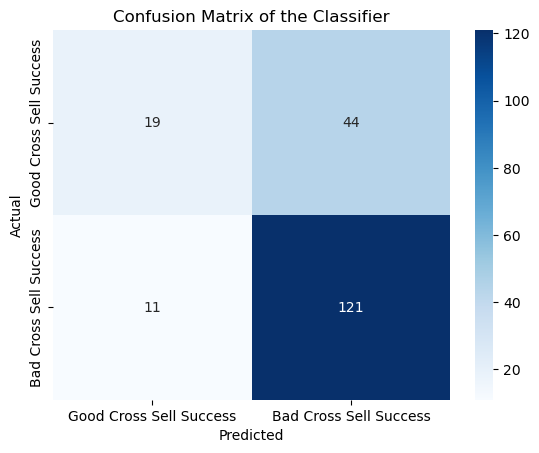

In [40]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Good Cross Sell Success', 'Bad Cross Sell Success'])

In [41]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6091


In [42]:
# zipping each feature name to its coefficient
logreg_model_values = zip(apprentice[candidate_dict['logit_full']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.02)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.22)
('AVG_TIME_PER_SITE_VISIT', 0.3)
('PC_LOGINS', -1.31)
('MOBILE_LOGINS', 0.13)
('WEEKLY_PLAN', 0.04)
('LATE_DELIVERIES', 0.0)
('AVG_PREP_VID_TIME', 0.17)
('AVG_ORDER_SIZE', -0.28)


In [43]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [44]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.641
Full Tree AUC Score: 0.5855


In [45]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 27
False Positives: 36
False Negatives: 34
True Positives : 98



In [46]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_tree_pred,
          labels = ['Good Cross Sell Success', 'Bad Cross Sell Success'])

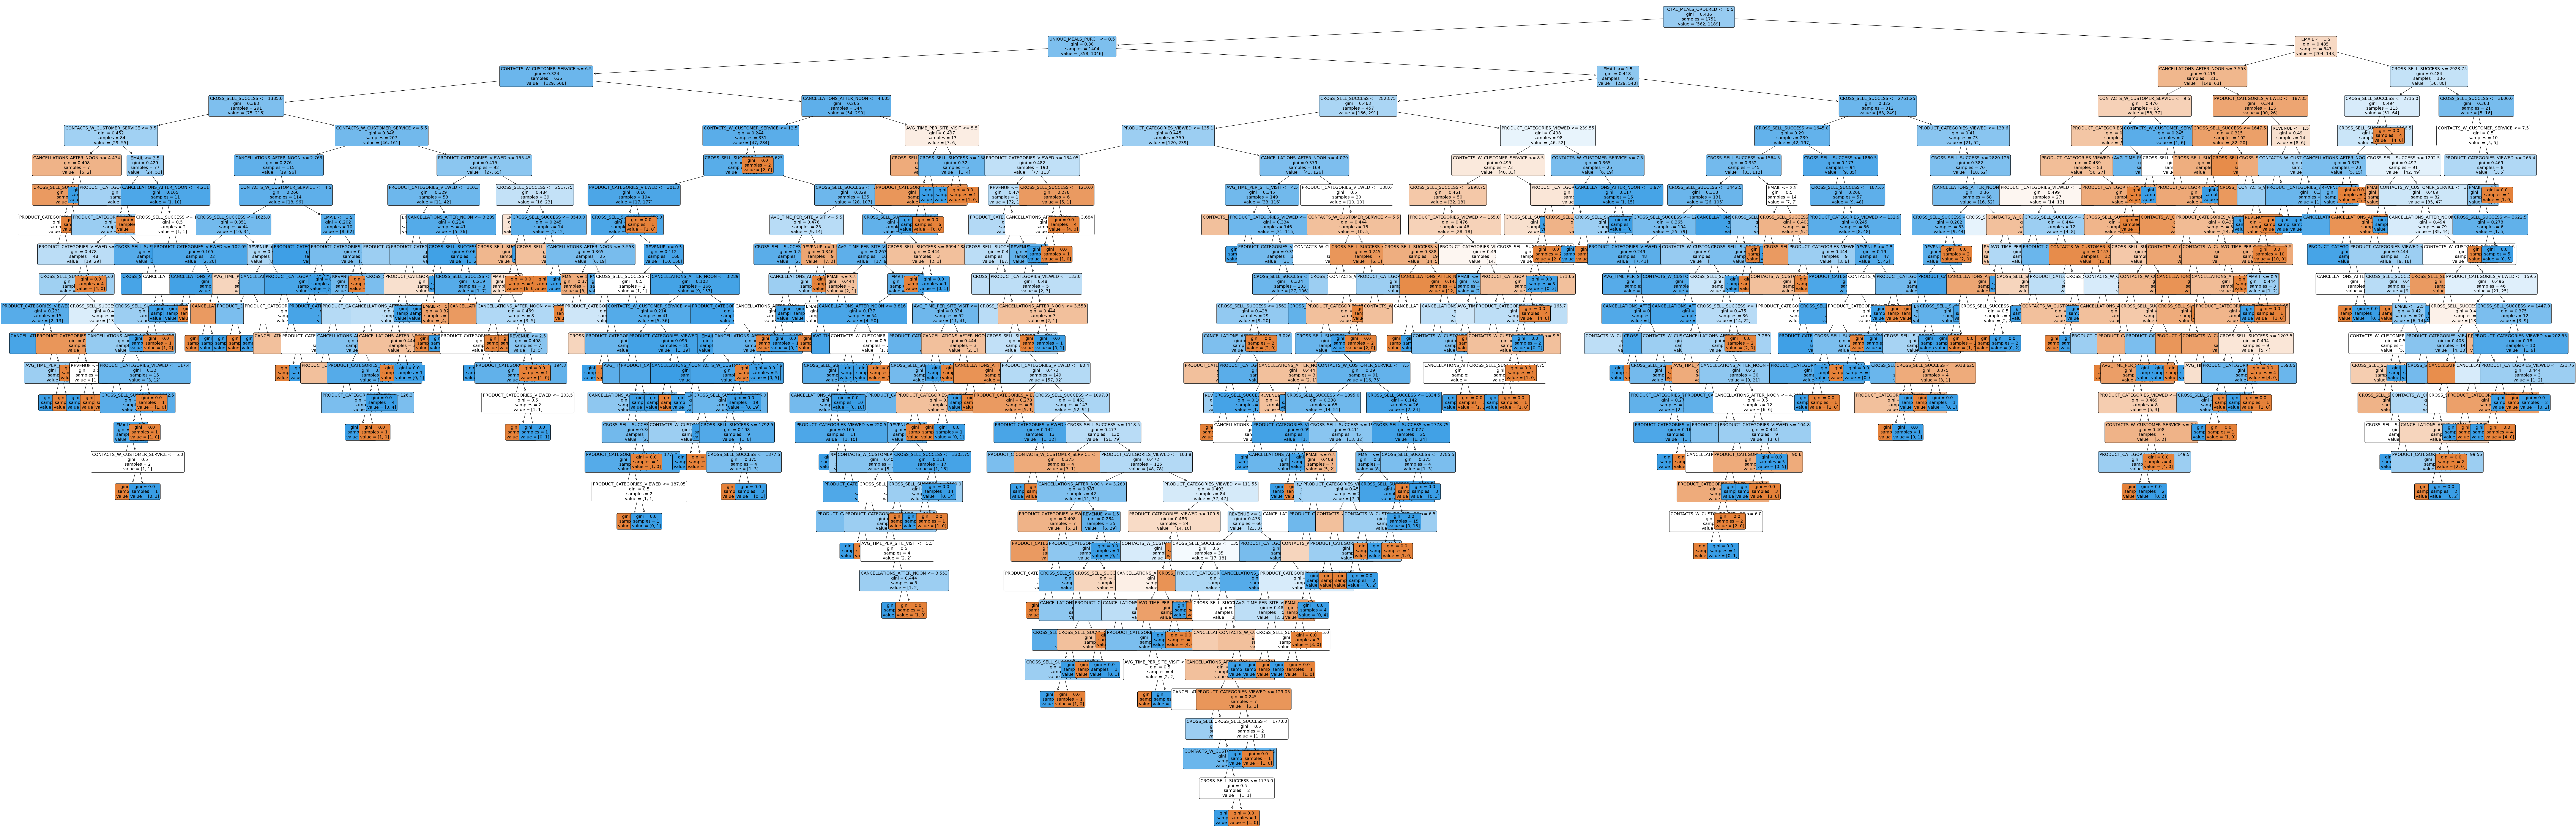

In [47]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = apprentice.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [49]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(splitter='best', 
                                     criterion='gini',
                                     max_depth=2,
                                     min_samples_leaf=1, 
                                     random_state=219)

# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)

# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)

# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true=y_test,
                                          y_score=tree_pruned_pred).round(4))

# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy

# saving auc score
pruned_tree_auc_score = roc_auc_score(y_true=y_test,
                                      y_score=tree_pruned_pred).round(4) # auc


Training ACCURACY: 0.7276
Testing  ACCURACY: 0.6974
AUC Score        : 0.5691


In [50]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 13
False Positives: 50
False Negatives: 9
True Positives : 123



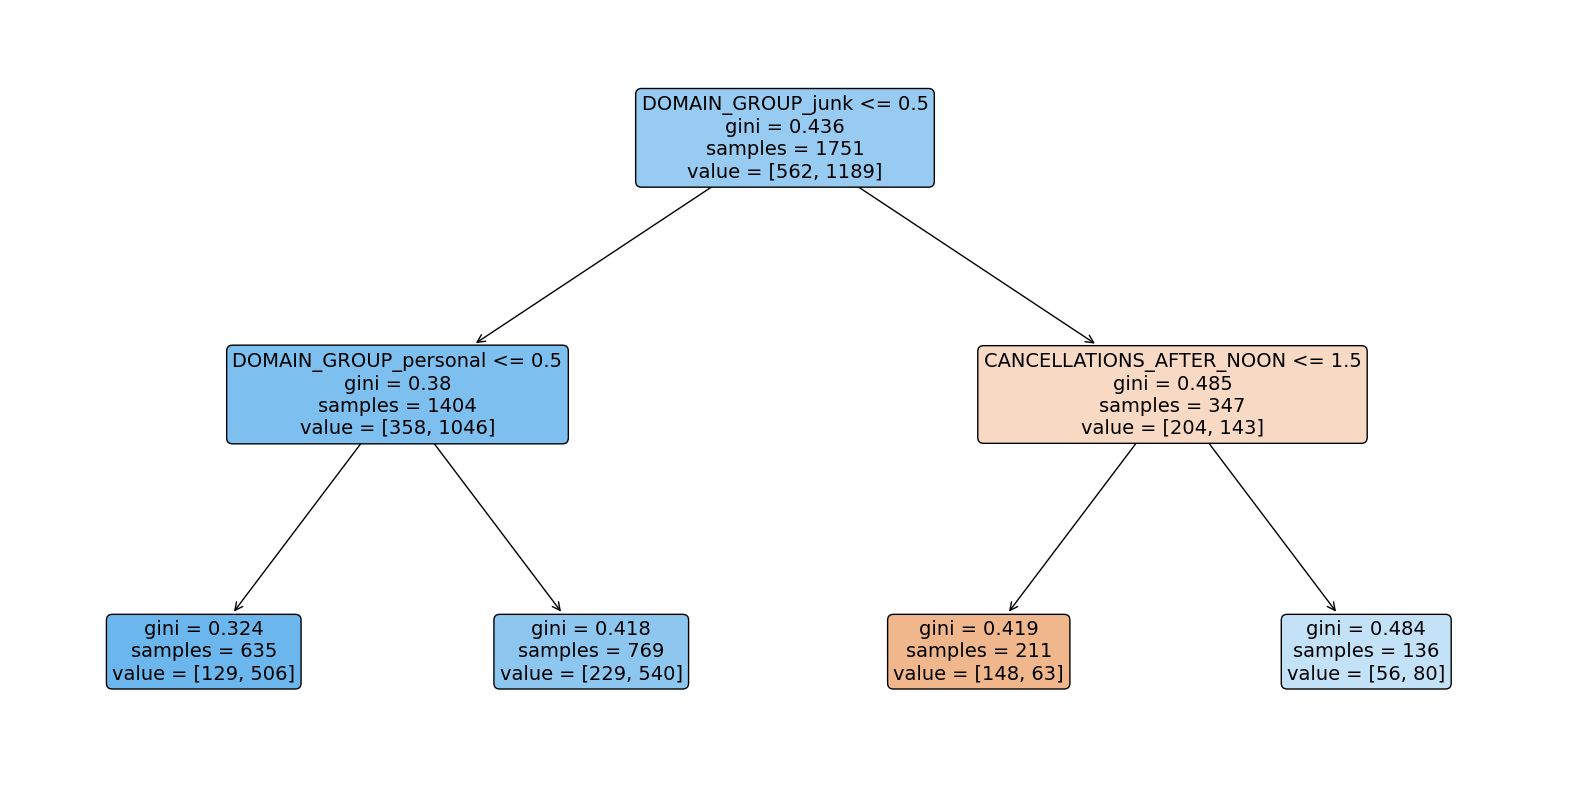

In [51]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

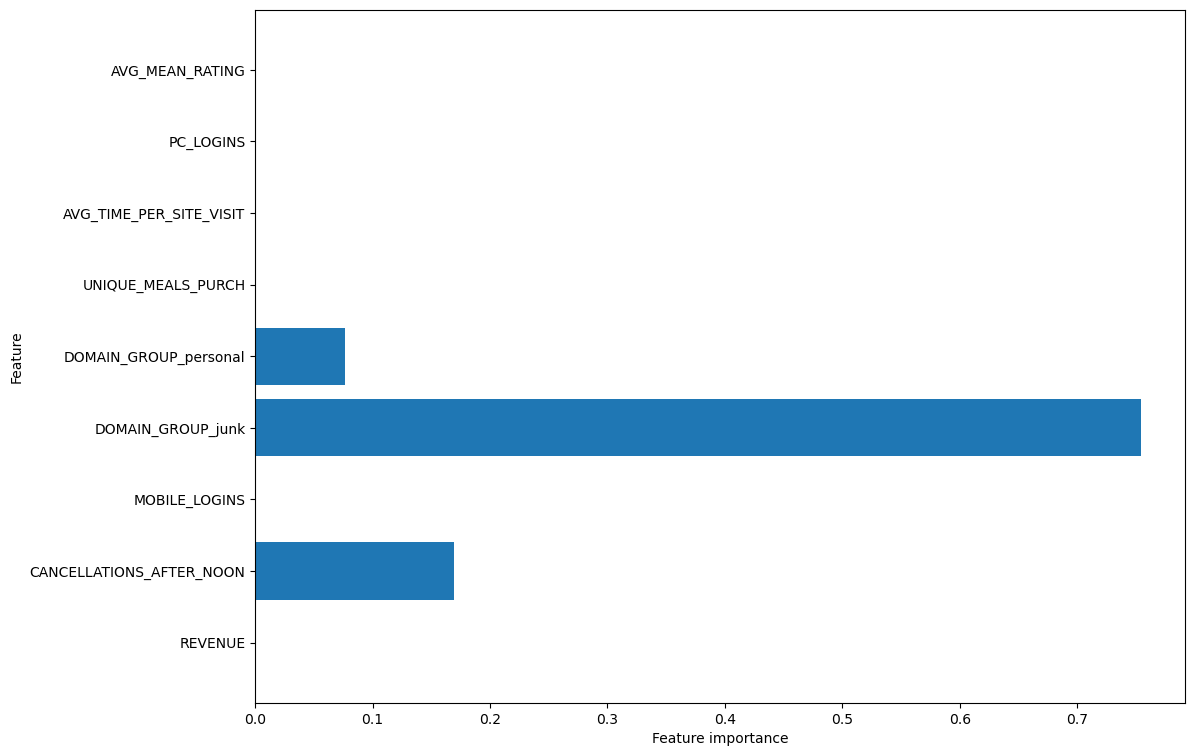

In [52]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

In [53]:
# declaring a hyperparameter space 
criterion_range = ["gini", "entropy"]
splitter_range  = ["best", "random"]
depth_range     = range(1, 8, 1)
leaf_range      = range(1, 100, 25)


# creating a hyperparameter grid
param_grid = {'criterion' : criterion_range,
              'splitter' : splitter_range,
              'max_depth' : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5, #5 Diff groups randomly
                                   n_iter                = 1000, #Number of Models its allowed to build-cap
                                   random_state          = 219)




# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                    max_depth=8,
                                    min_samples_leaf=2, 
                                    min_samples_split=2,
                                    random_state=219, splitter='random')




tuned_tree_cv.fit(x_train,y_train)


print(f""" \n Train Metrics:

            CV AUC Score: {round(tuned_tree_cv.best_score_,3)}
            model Parameters: {tuned_tree_cv.best_params_},
            best Model: {tuned_tree_cv.best_estimator_}
            
            """)

/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 112 is smaller than n_iter=1000. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 
 Train Metrics:

            CV AUC Score: 0.728
            model Parameters: {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 2, 'criterion': 'gini'},
            best Model: DecisionTreeClassifier(max_depth=2, random_state=219)
            
            


In [54]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 13
False Positives: 50
False Negatives: 9
True Positives : 123



In [55]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

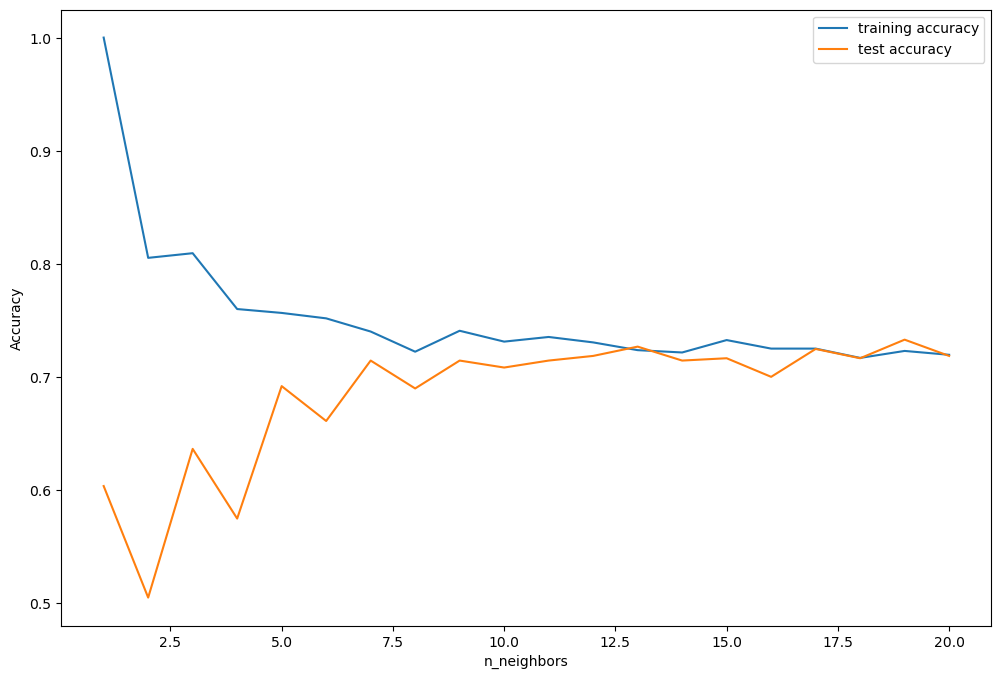

The optimal number of neighbors is: 19


In [56]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = apprentice_data,
                                  y_data        = apprentice_target,
                                  response_type = 'class')

In [57]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(apprentice_data)

# TRANSFORMING the data
x_scaled = scaler.transform(apprentice_data)

# converting to a DataFrame
x_scaled_df = pd.DataFrame(x_scaled) 

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            apprentice_target,
            random_state = 219,
            test_size = 0.25,
            stratify = apprentice_target)

# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)

# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true = y_test_scaled, y_score = knn_pred).round(4))

# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score = knn_fit.score(x_test_scaled, y_test_scaled).round(4)

# saving AUC score
knn_auc_score = roc_auc_score(y_true = y_test_scaled, y_score = knn_pred).round(4)


Training ACCURACY: 0.7354
Testing  ACCURACY: 0.7002
AUC Score        : 0.5897


/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karlagarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [58]:
# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 27
False Positives: 36
False Negatives: 34
True Positives : 98



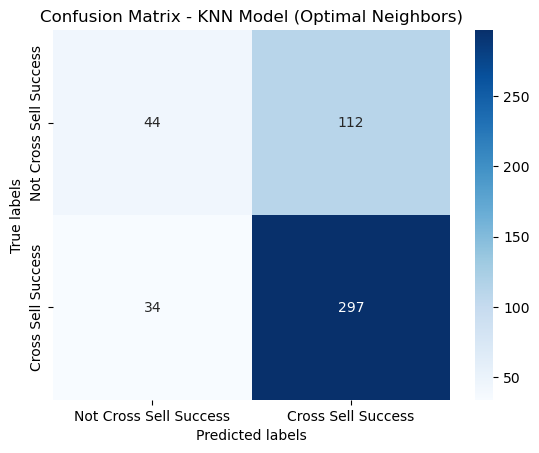

In [59]:
# building the confusion matrix
cm = confusion_matrix(y_true = y_test_scaled, y_pred = knn_pred)

# visualizing the confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')

# setting labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN Model (Optimal Neighbors)')
plt.xticks([0.5, 1.5], ['Not Cross Sell Success', 'Cross Sell Success'])
plt.yticks([0.5, 1.5], ['Not Cross Sell Success', 'Cross Sell Success'])
plt.show()

In [60]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
KNN           {knn_auc_score}         {knn_tn, knn_fp, knn_fn, knn_tp}
""")

# modifying the model_performance dictionary
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', 'KNN'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score, knn_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, knn_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, knn_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (knn_tn, knn_fp, knn_fn, knn_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6091         (19, 44, 11, 121)
Full Tree     0.5855         (27, 36, 34, 98)
Pruned Tree   0.5691         (13, 50, 9, 123)
KNN           0.5897         (27, 36, 34, 98)



In [61]:
"""NOTE: when I did the hyperparameter tuning for the Decision Tree Classifier it gave me a AUC scroe of 0.72,
however, by putting those parameters in the model, it still have me a low AUC score, I don't know why."""

"NOTE: when I did the hyperparameter tuning for the Decision Tree Classifier it gave me a AUC scroe of 0.72,\nhowever, by putting those parameters in the model, it still have me a low AUC score, I don't know why."